In [1]:
import pandas as pd
import numpy as np

In [2]:
trn = pd.read_csv('train.csv', na_values=['-1','-1.0'])
tst = pd.read_csv('test.csv', na_values=['-1','-1.0'])

In [6]:
tst['target'] = np.nan
df = pd.concat([trn, tst], axis=0) #훈련 데이터와 테스트 데이터 통합

/Users/yshin/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

* 모든 변수가 익명화되어 있음, 데이터 타입은 int64 / flot64로 통일
* '_bin' : 이진변수, '_cat': 범주형변수
* 일부 결측값 있음 (불러올 때 -1을 NA값으로 지정)

In [4]:
#예측해야 할 target 값(보험 청구 여부) 의 분포
print(np.unique(trn['target']))
print(1.0 * sum(trn['target'])/trn.shape[0])

[0 1]
0.036447517859182946


* 전체에서 3.6%의 운전자가 보험을 청구함

### 데이터 시각화

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# 이진 변수
binary = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 
          'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
# 범주형 변수
category = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
            'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
            'ps_car_10_cat', 'ps_car_11_cat']
# 정수형 변수
integer = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 
           'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 
           'ps_calc_14', 'ps_car_11']
# 소수형 변수
floats = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

In [8]:
# 시각화 관련 함수 미리 정의
def bar_plot(col, data, hue=None):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.show()
    
def dist_plot(col, data):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.distplot(data[col].dropna(), kde=False, bins=10)
    plt.show()
    
def bar_plot_ci(col, data):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=col, y='target', data=data)
    plt.show()

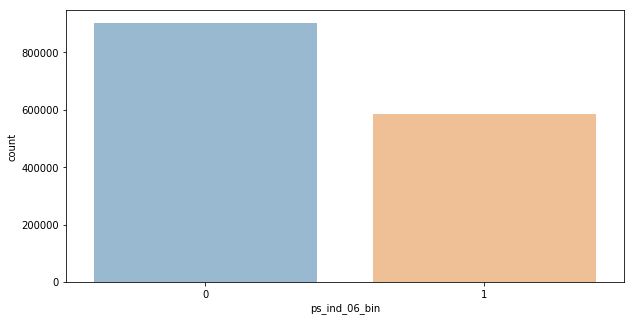

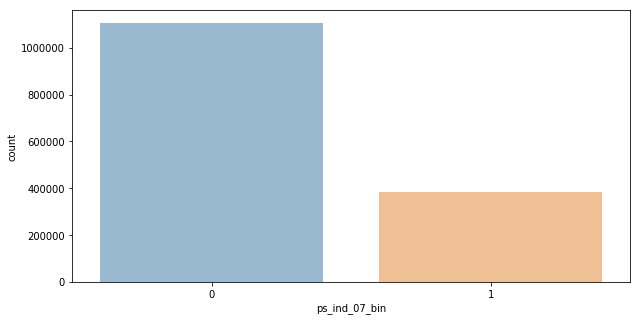

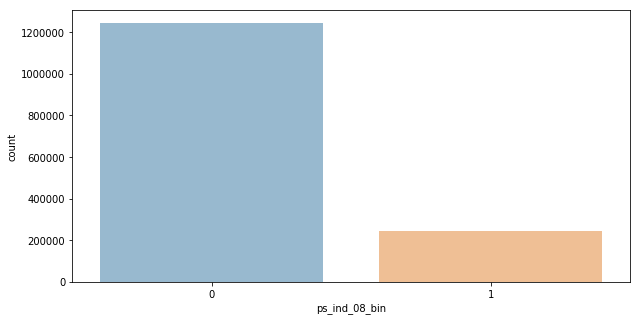

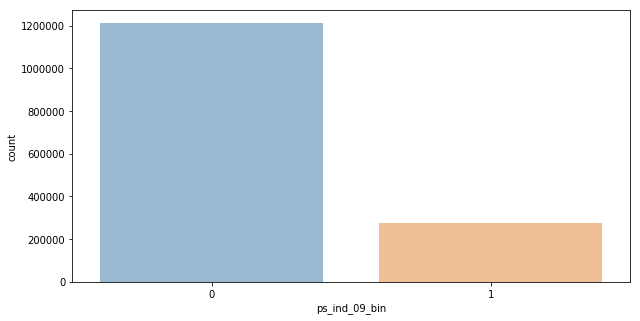

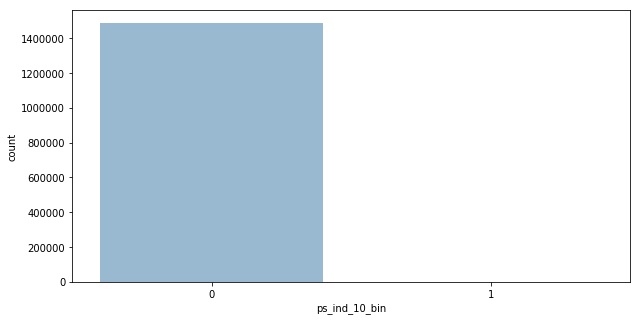

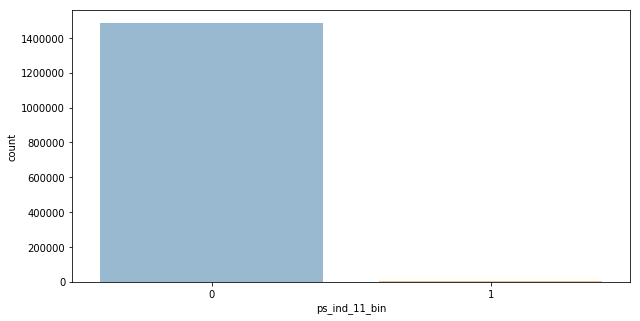

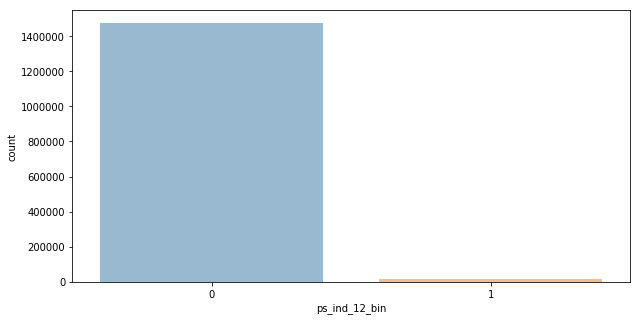

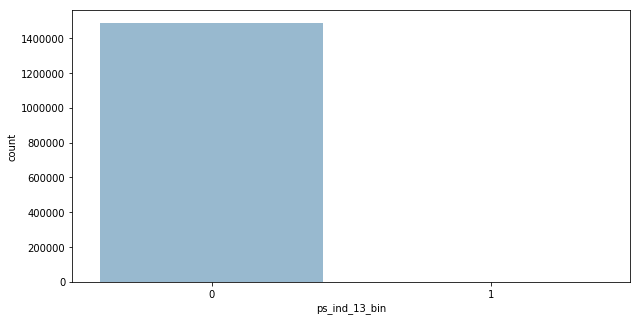

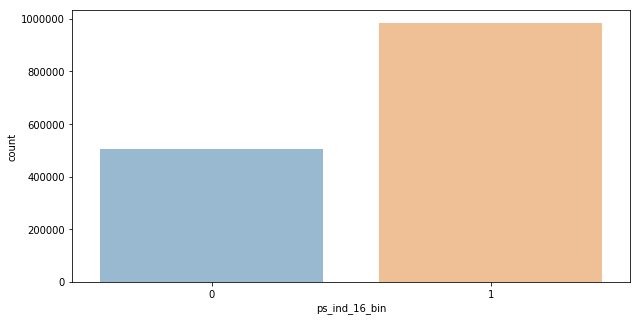

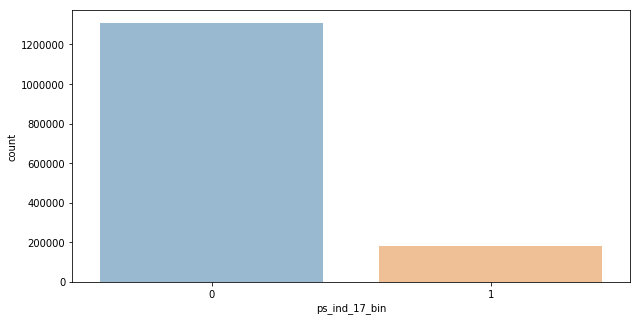

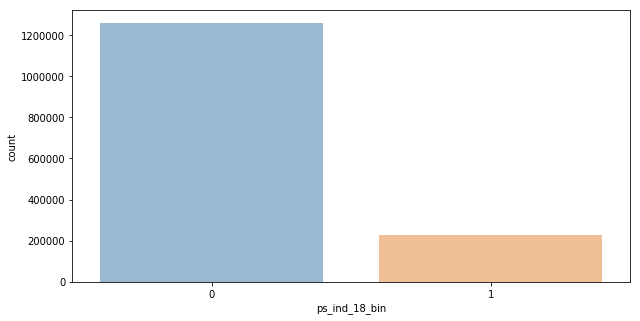

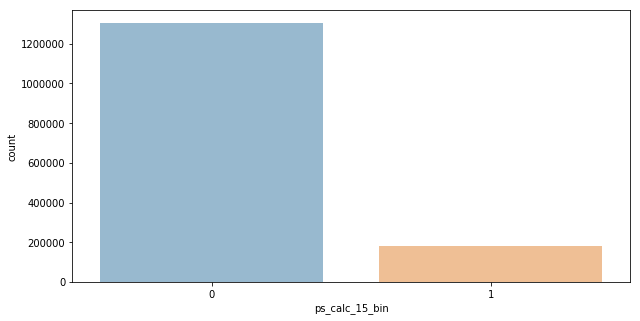

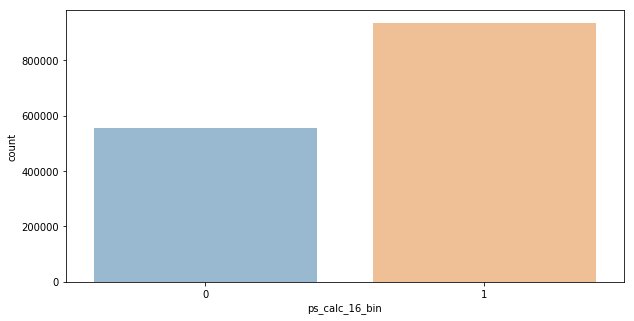

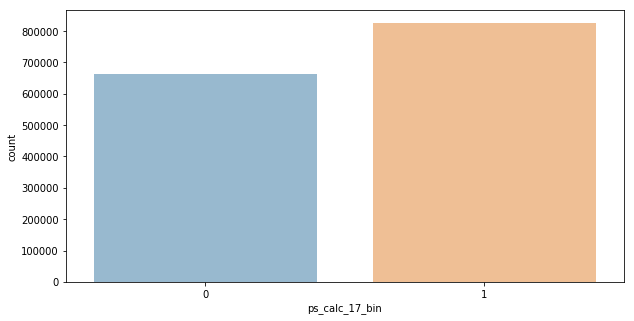

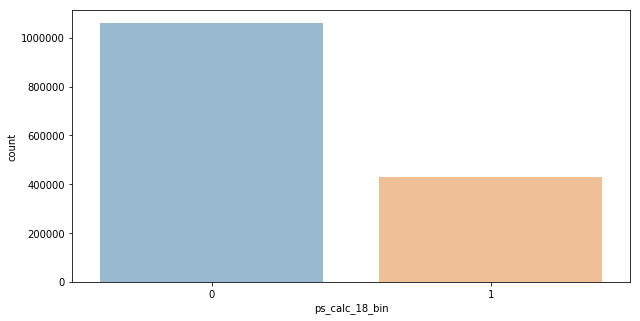

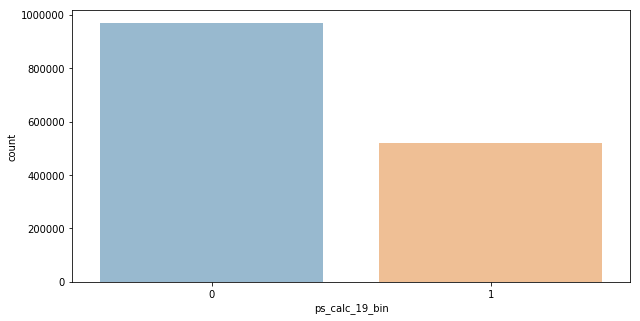

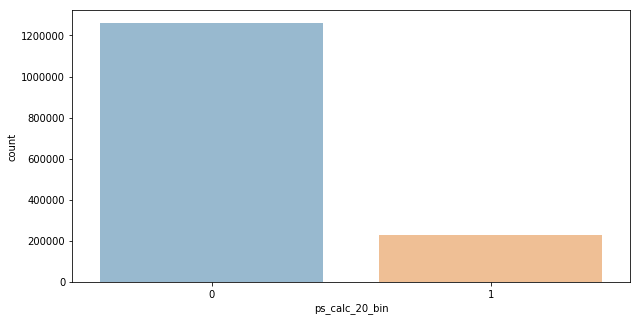

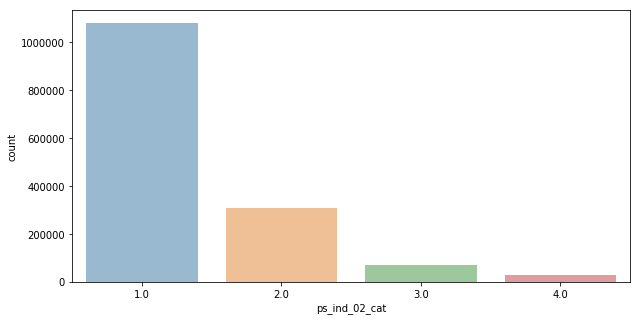

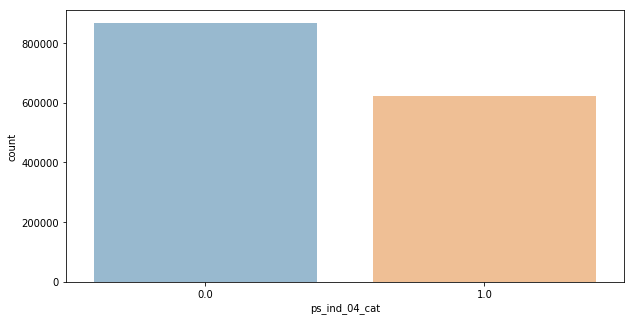

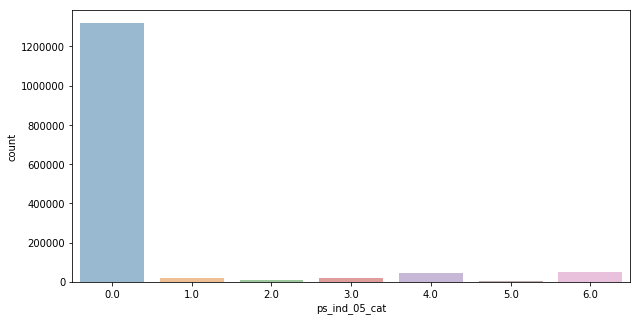

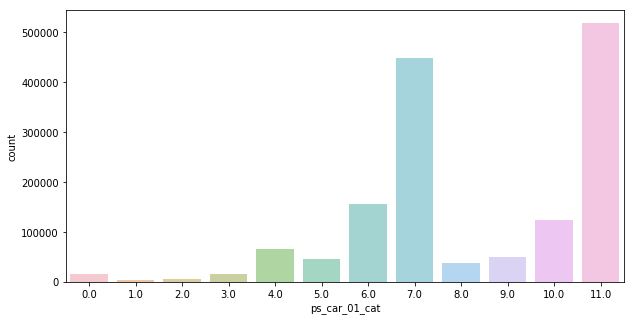

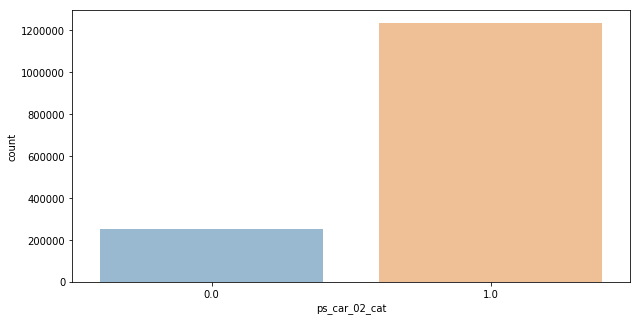

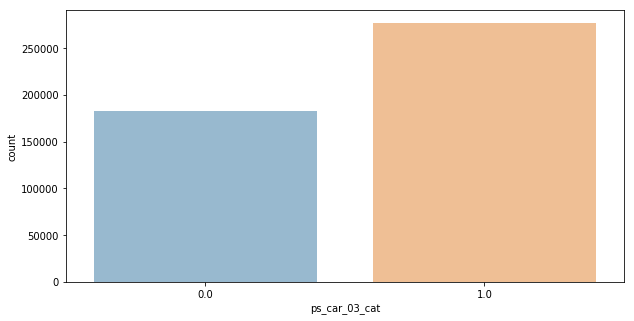

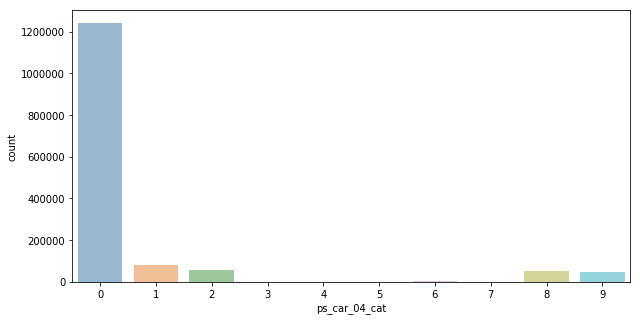

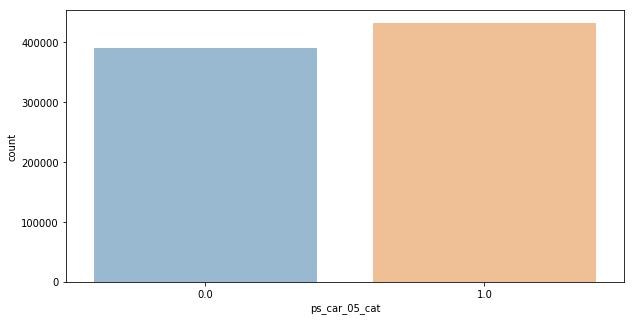

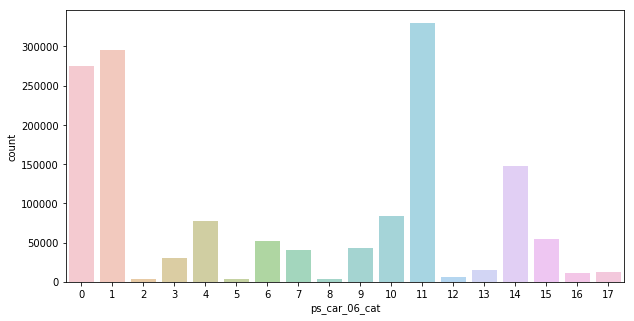

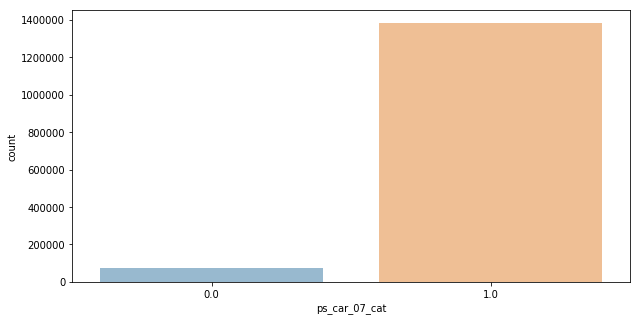

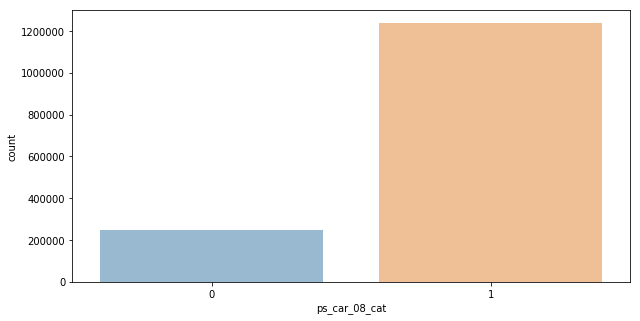

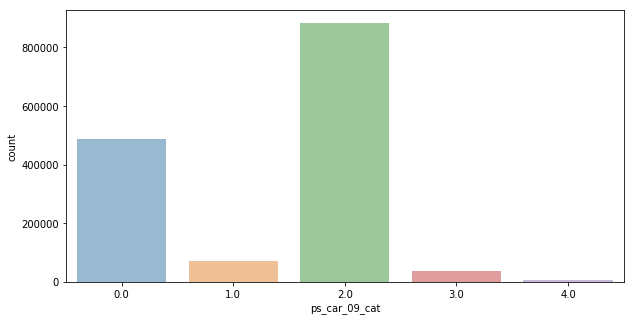

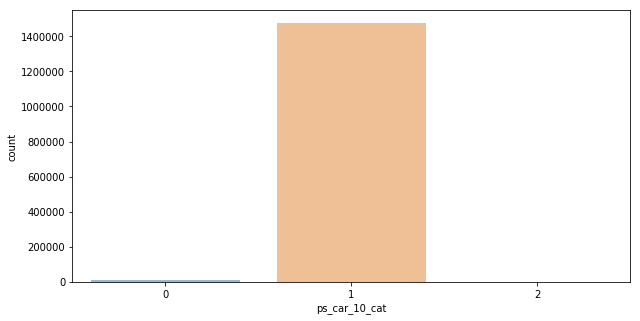

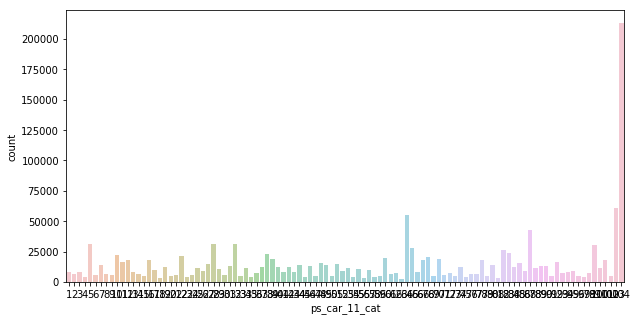

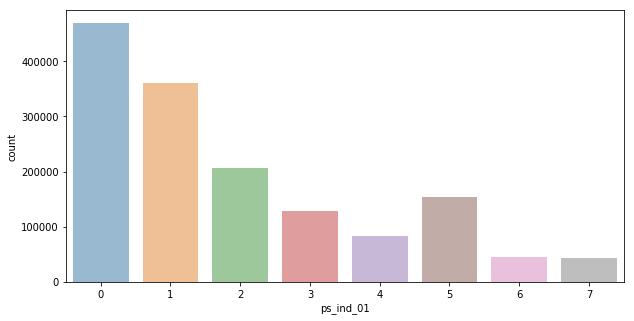

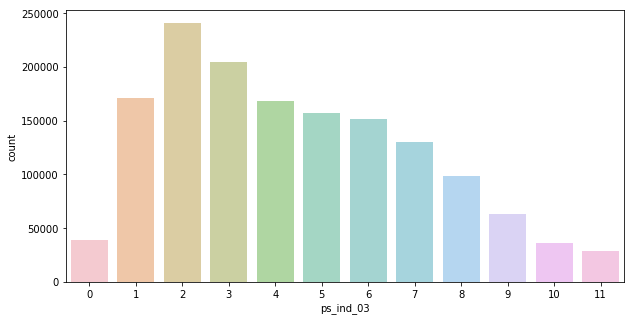

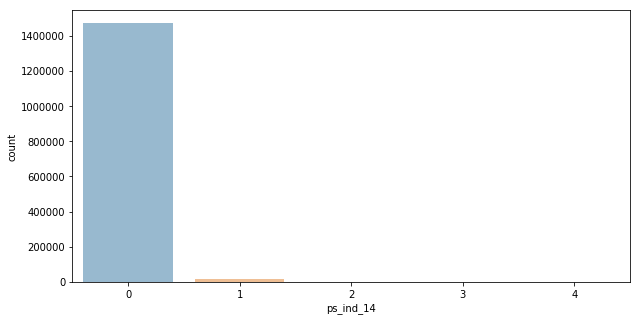

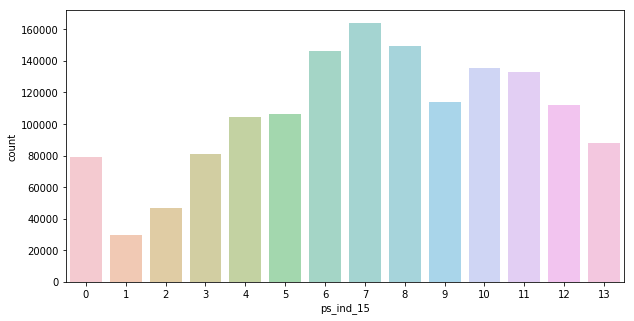

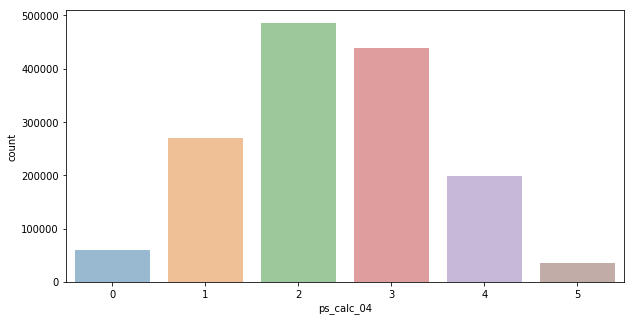

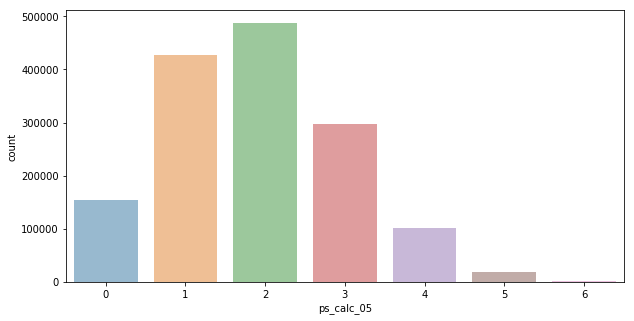

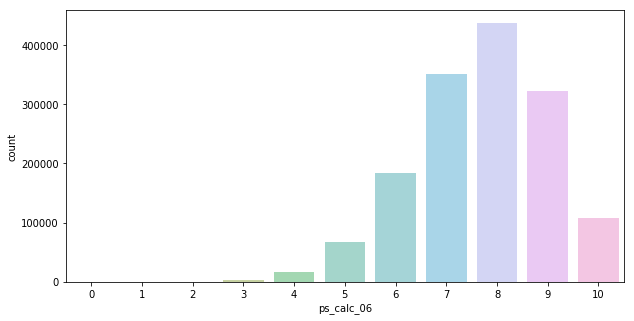

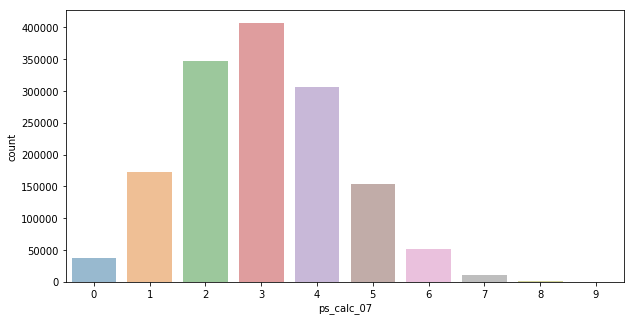

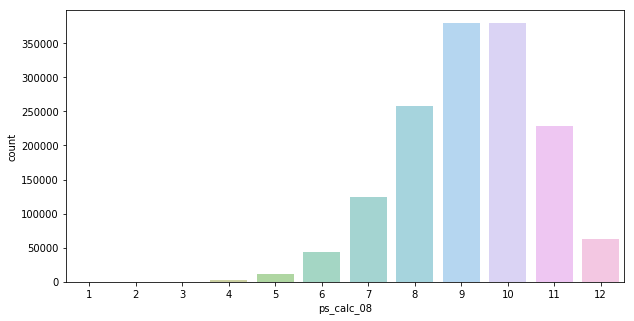

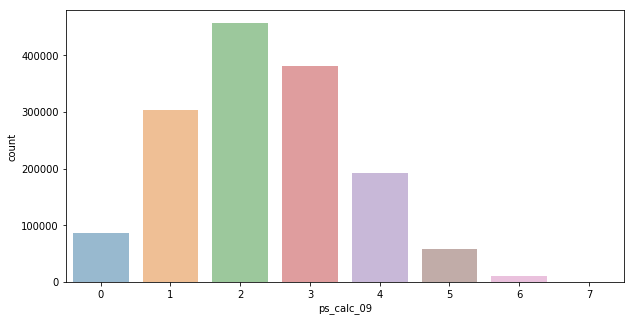

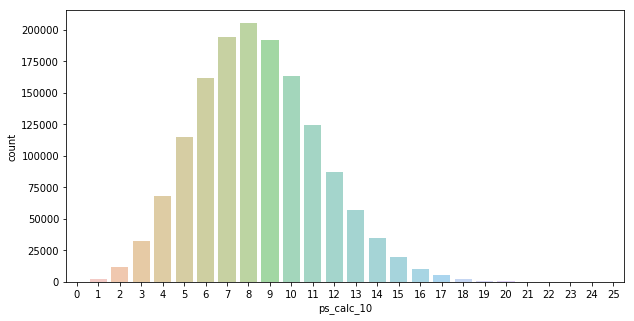

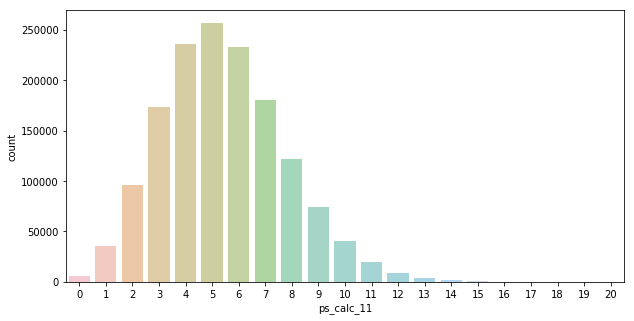

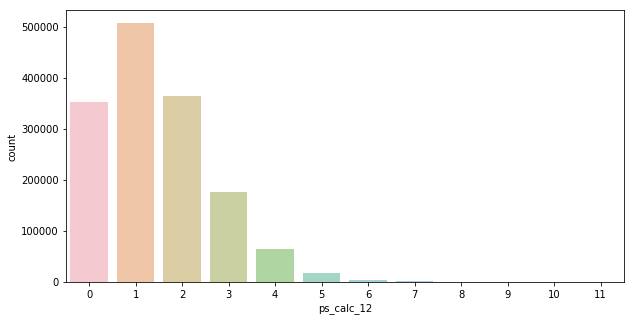

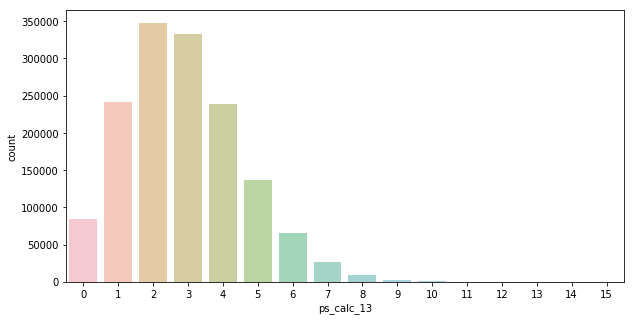

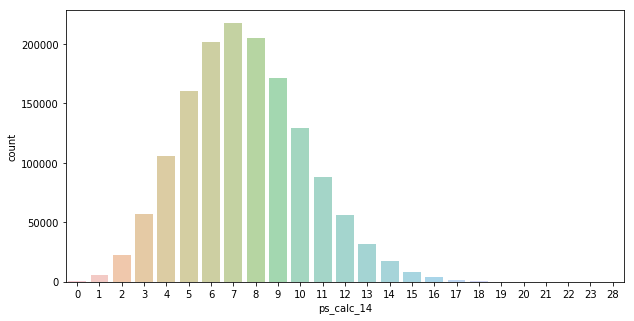

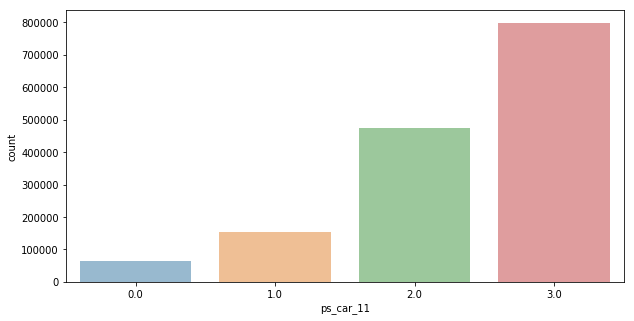

In [9]:
for col in binary + category + integer:
    bar_plot(col, df)

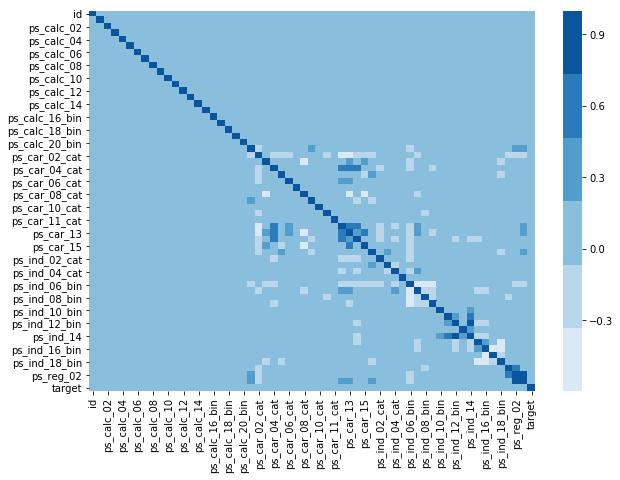

In [10]:
#변수간 상관관계 Heatmap
corr = df.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

* 대부분의 변수들이 상관관계가 매우 낮음

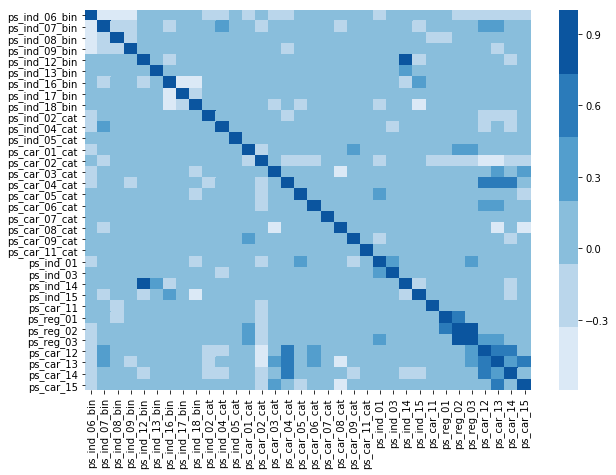

In [11]:
# 일부 변수만 선별
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
          'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
          'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
          'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
          'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

corr_sub = df[features].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_sub, cmap=cmap)

* ind-14와 ind_12_bin : 0.89로 높은 상관관계 *일반적으로 0.95이상의 상관이면 변수를 하나 제거한다고 할 때, 이 경우별도로 제거하지 않음

/Users/yshin/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


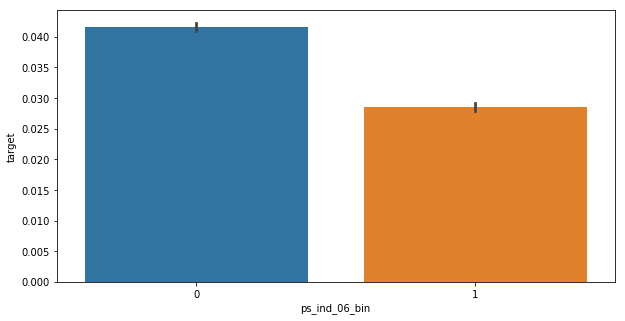

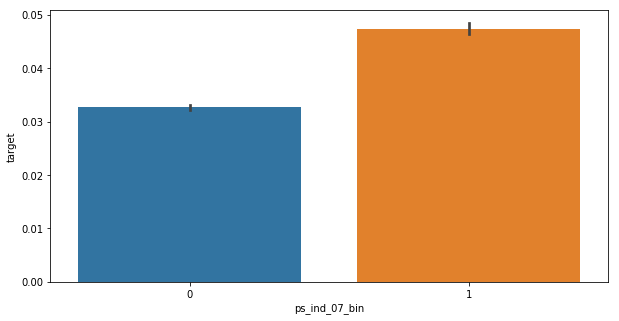

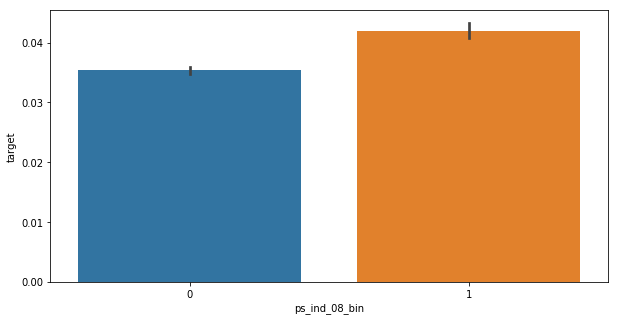

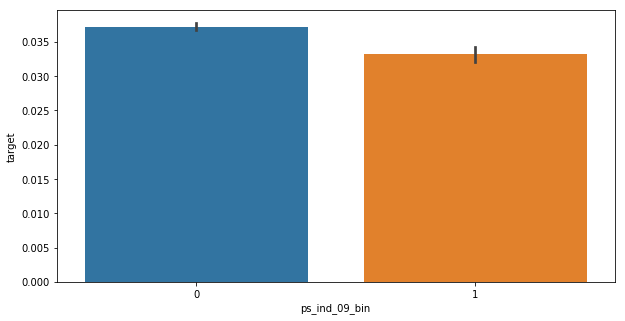

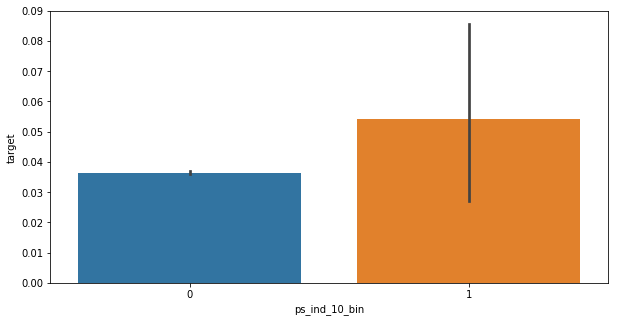

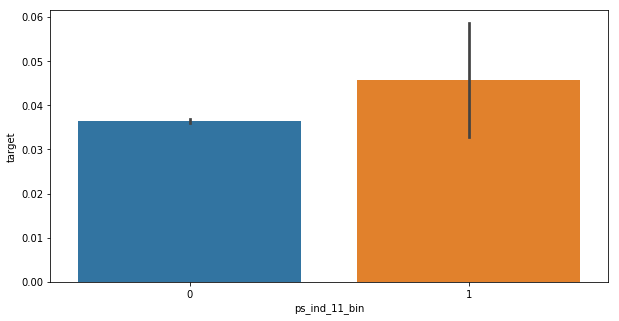

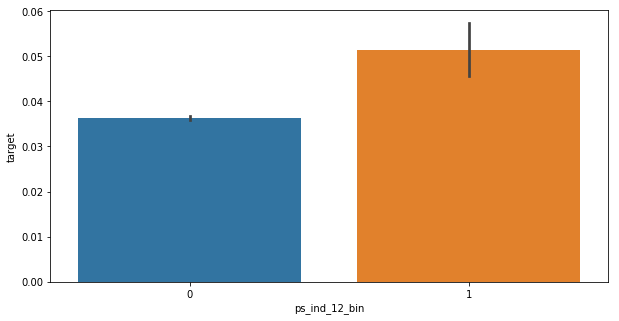

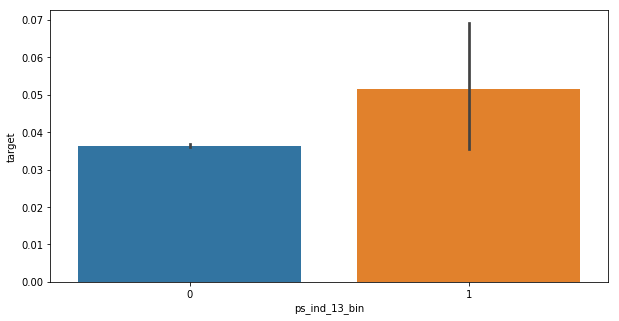

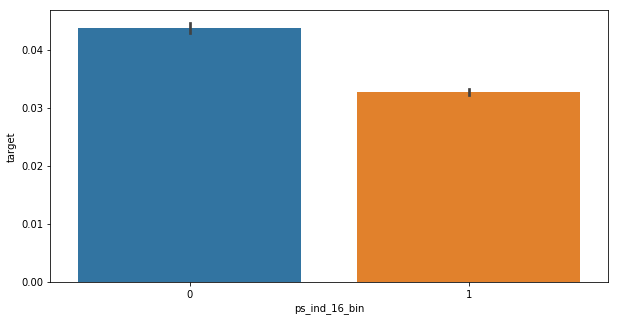

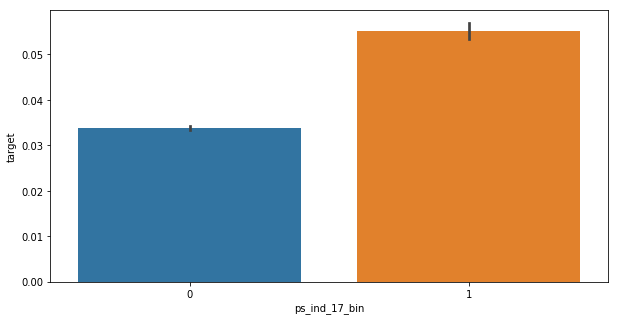

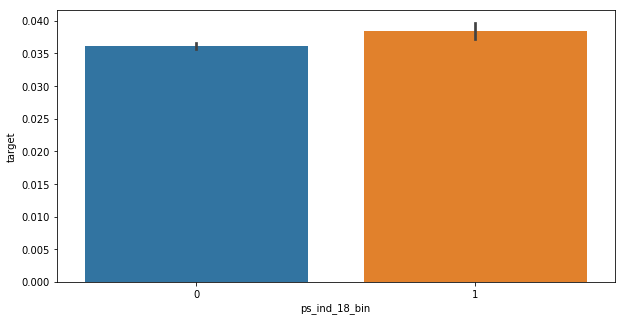

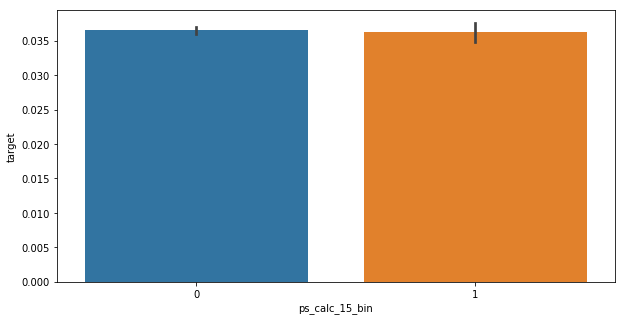

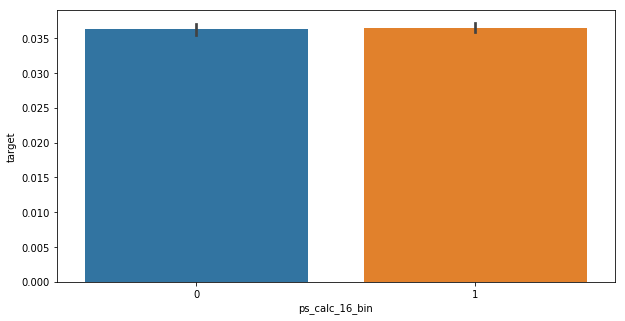

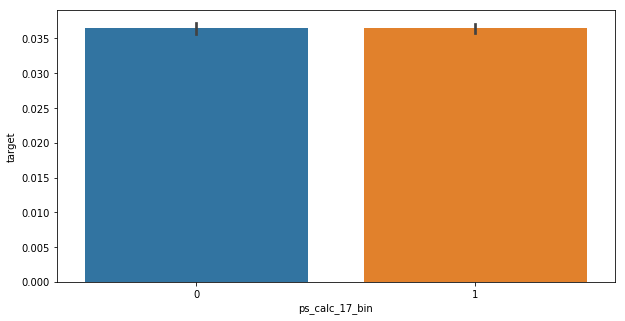

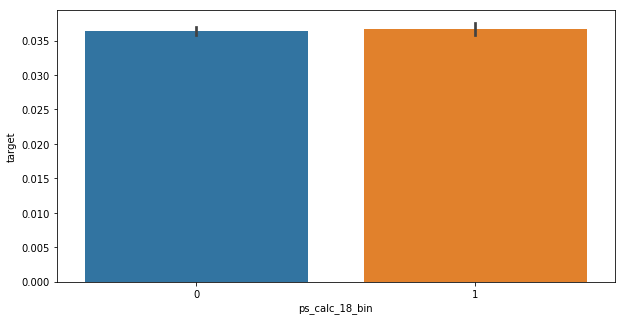

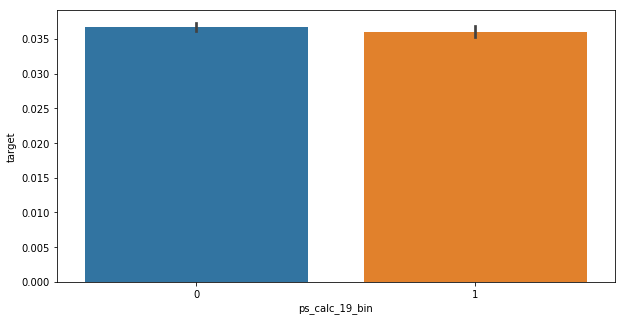

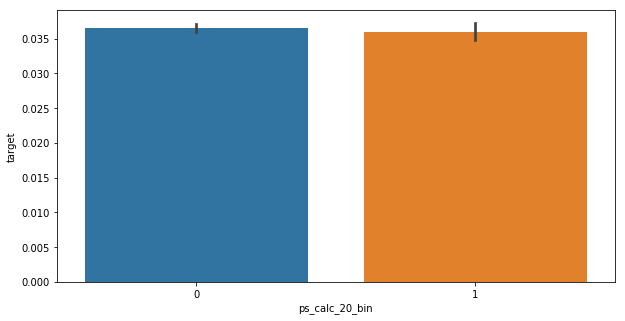

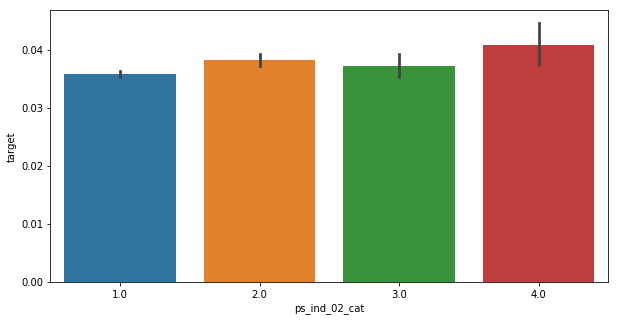

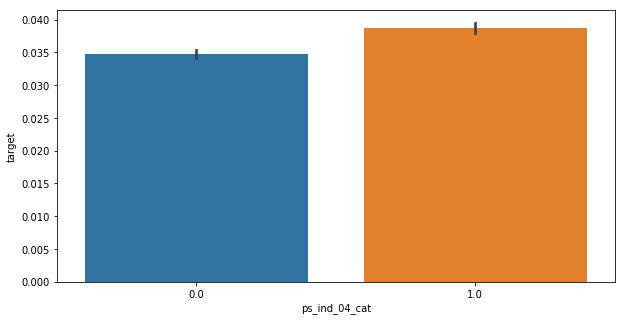

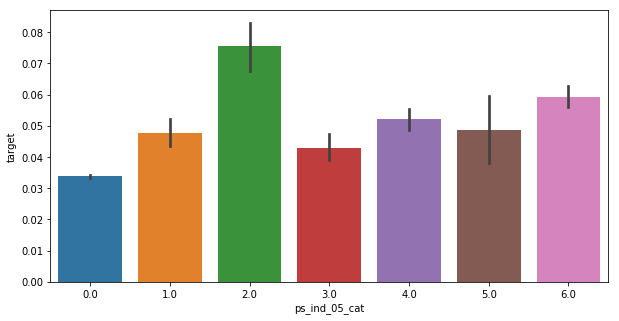

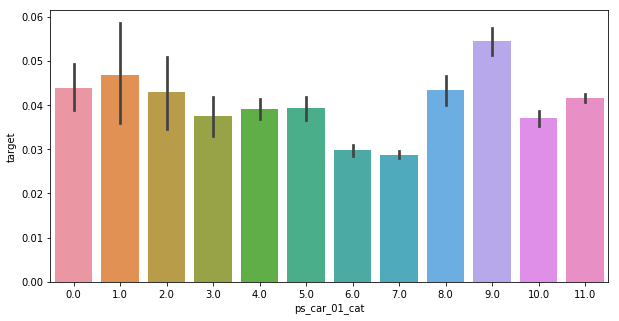

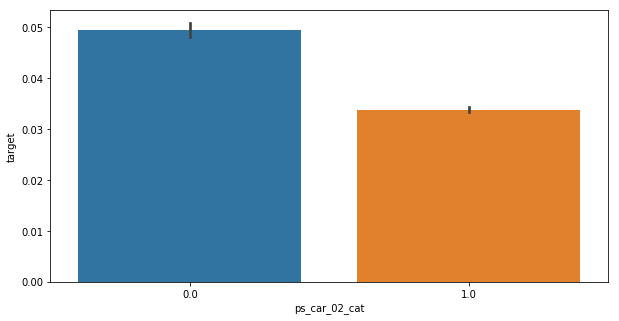

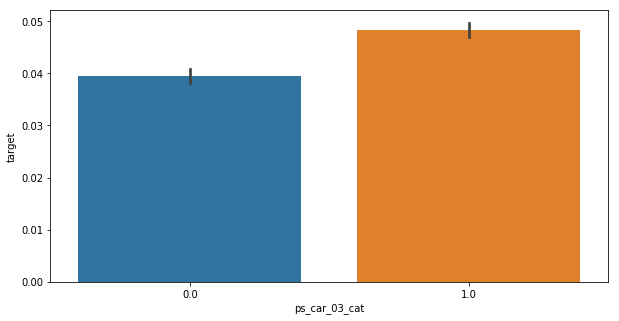

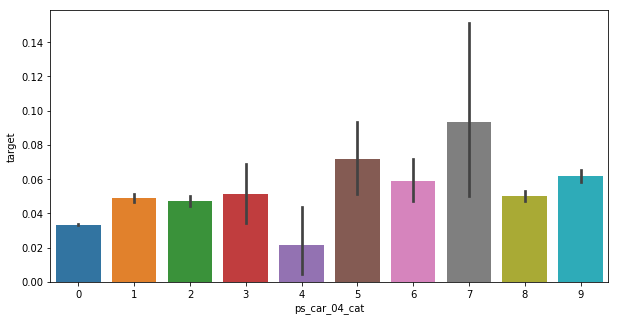

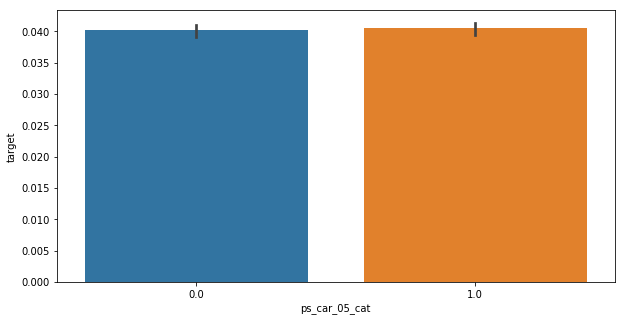

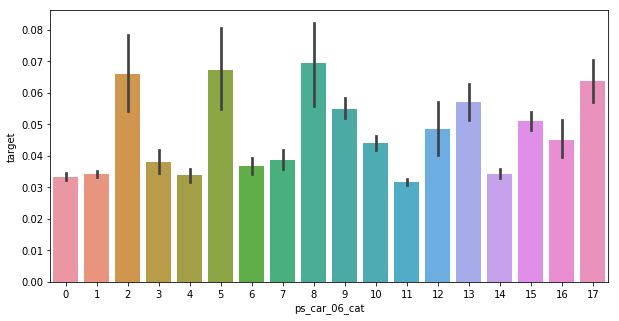

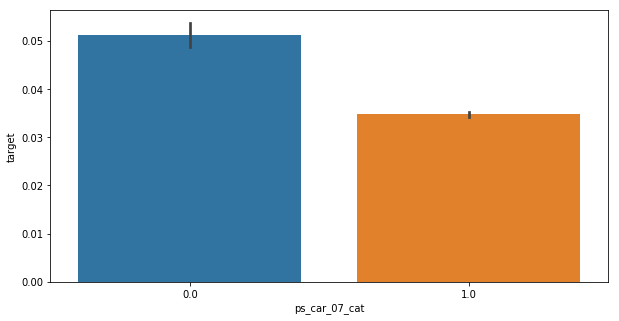

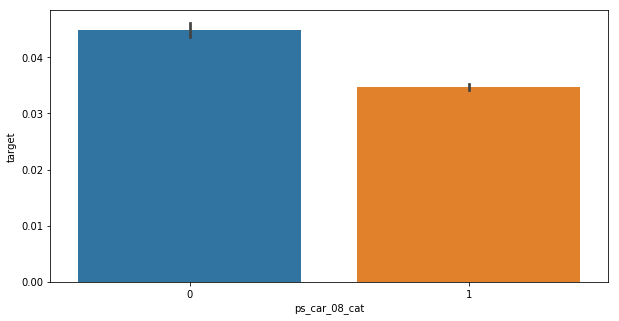

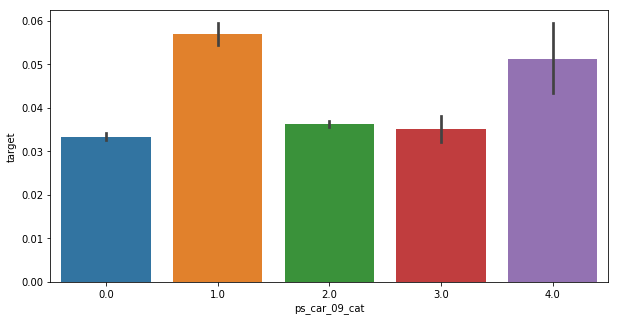

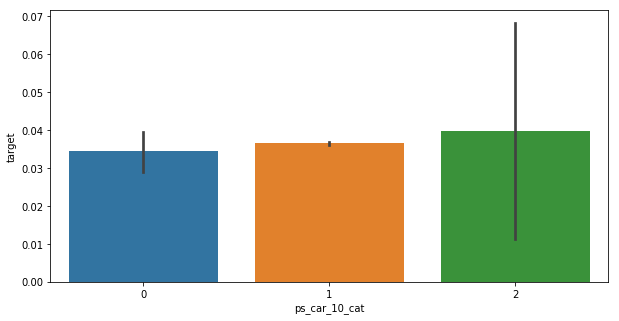

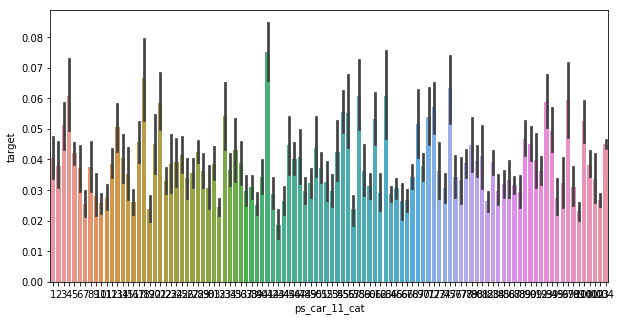

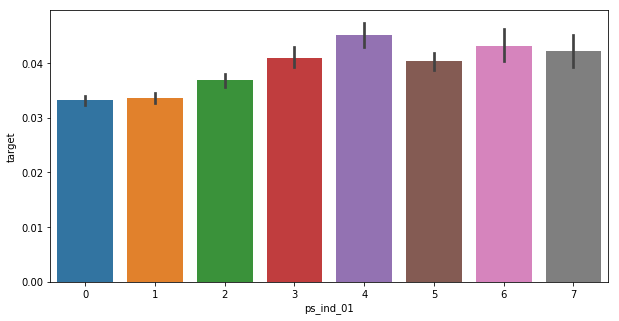

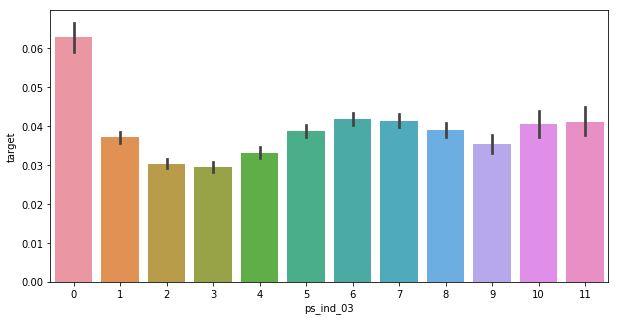

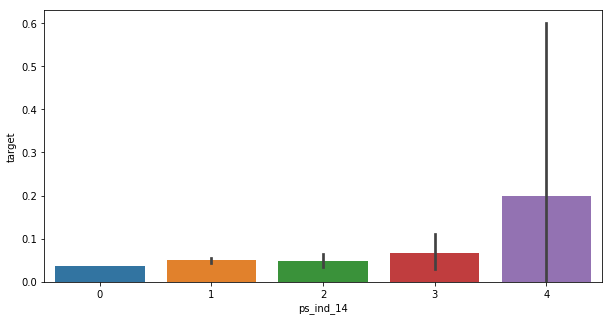

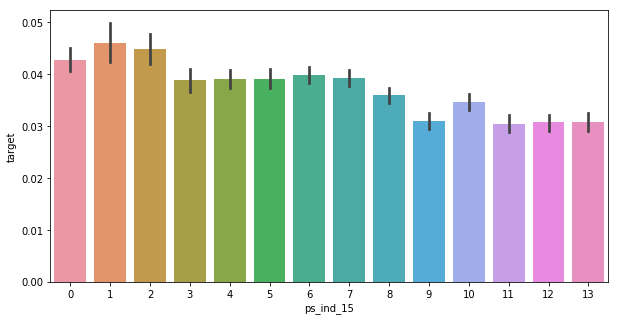

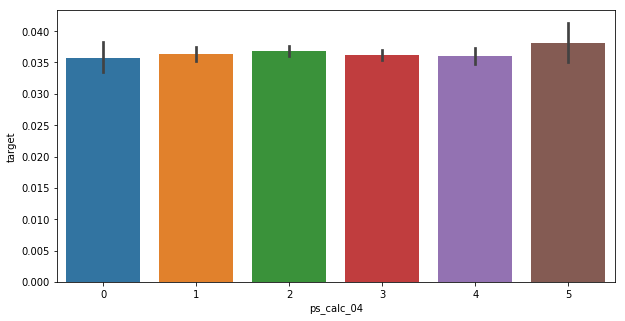

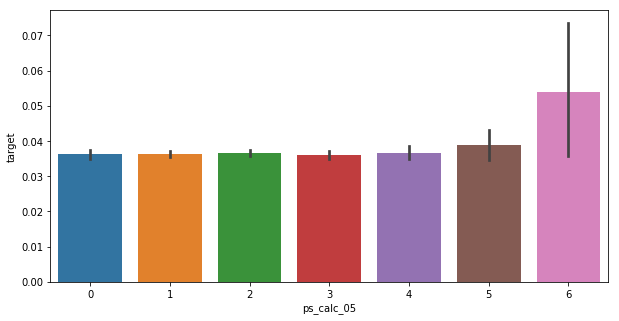

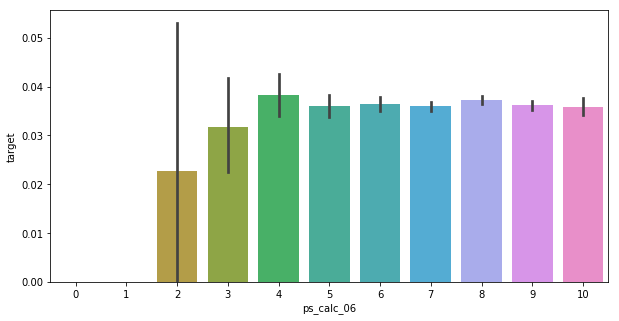

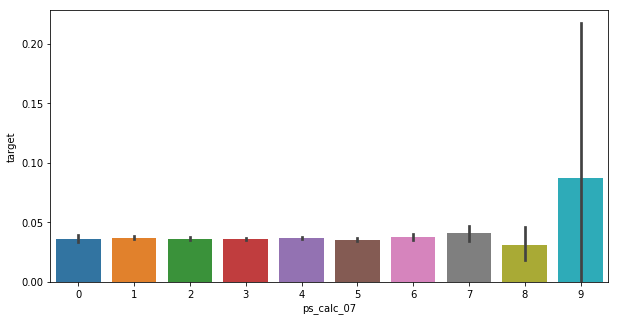

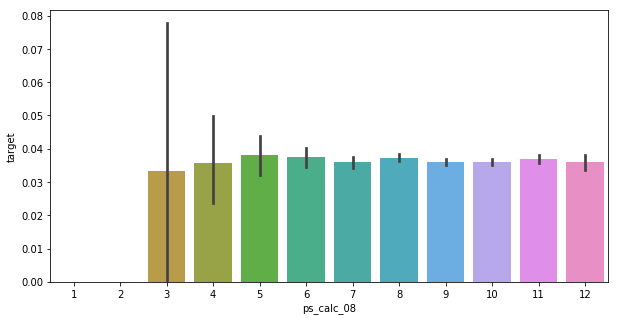

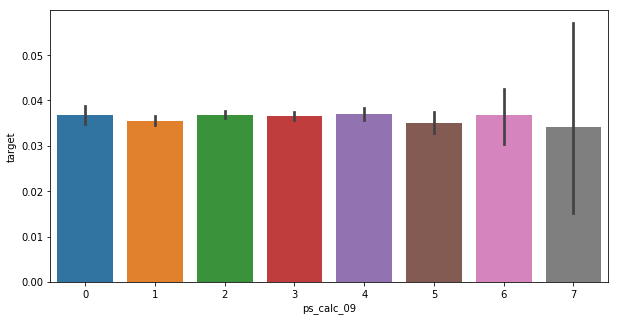

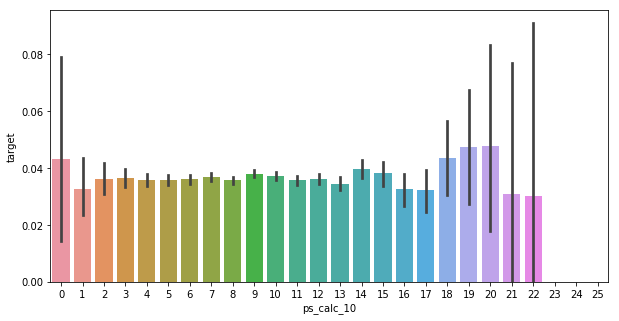

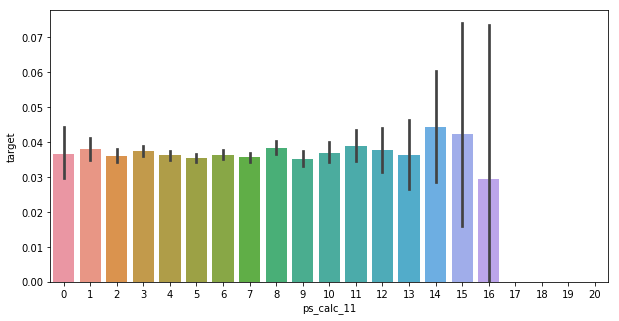

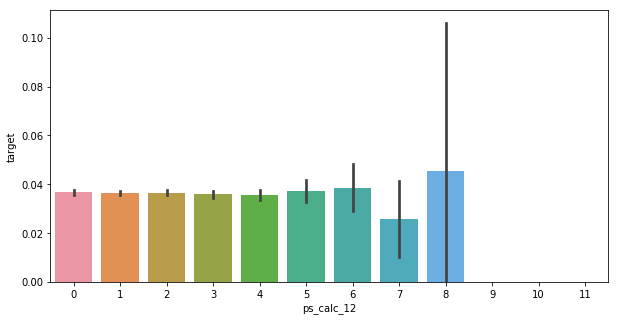

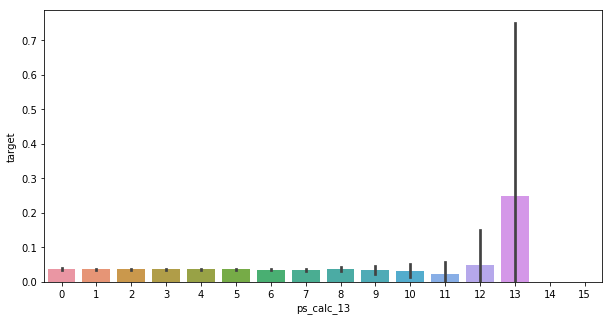

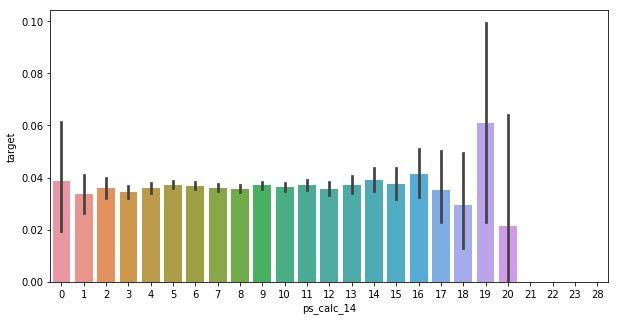

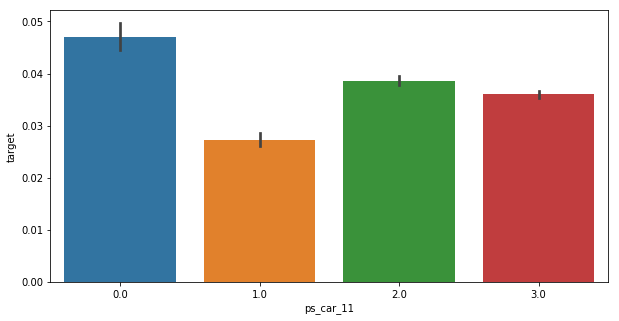

In [12]:
# 단일 변수의 고윳값별로 타겟 변수의 비율 시각화
for col in (binary + category + integer):
    bar_plot_ci(col, df)

**타겟에 대한 예측력이 높은 변수를 찾아보기**
* ind_16_bin, ind_06_bin의 경우 값에 따라 타겟의 비율이 다름 (모델링 관점에서 유용한 변수)
* car_01_cat은 7, 11에서 타겟 비율이 상대적으로 낮은 편
* car_11_cat은 104개의 값마다 0.02~0.08의 큰 범위의 타겟 비율 보임
* ind_01, ind_03은 고유값별로 95% 신뢰구간이 군집화됨

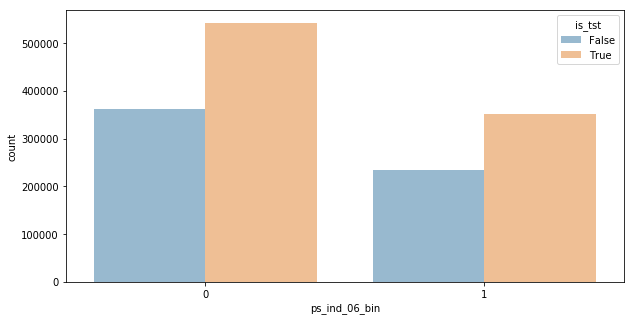

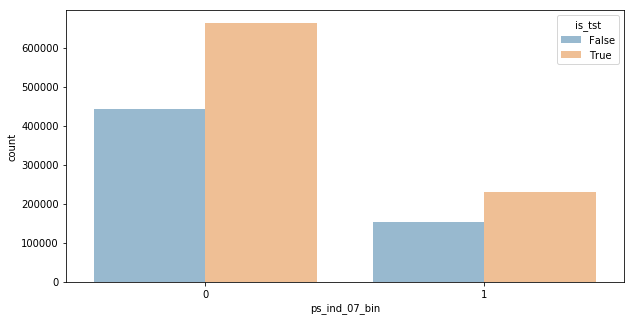

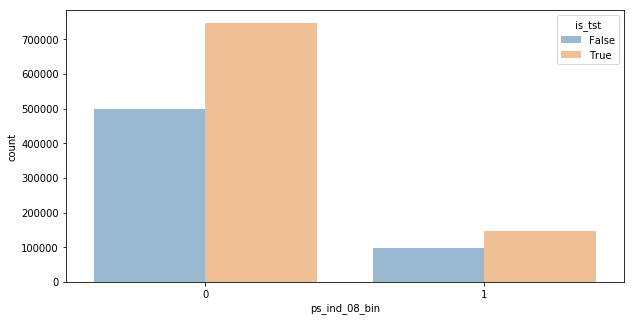

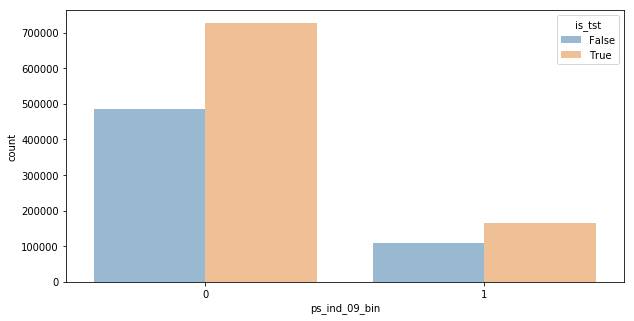

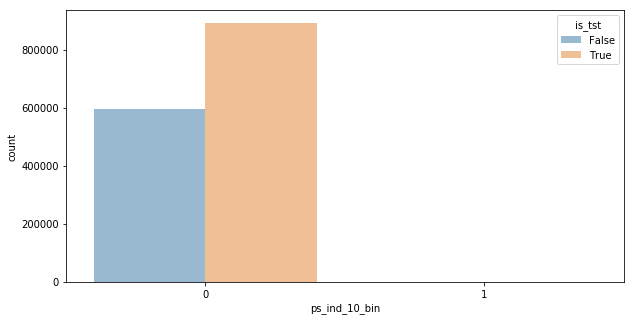

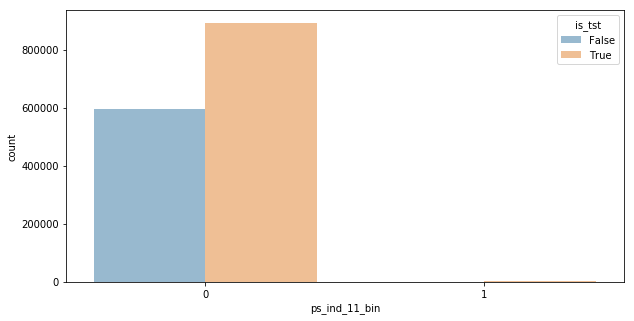

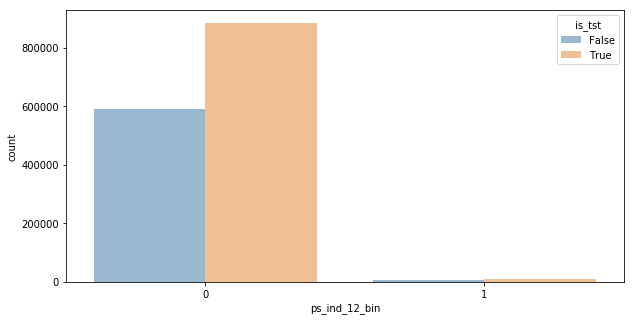

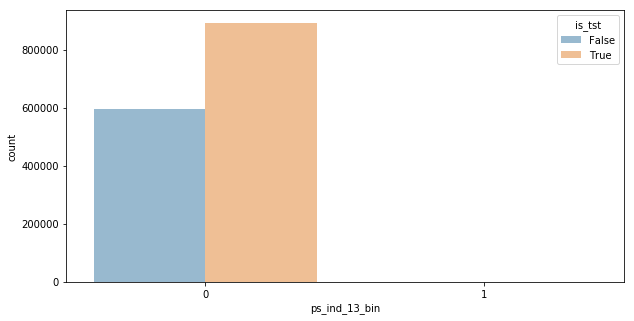

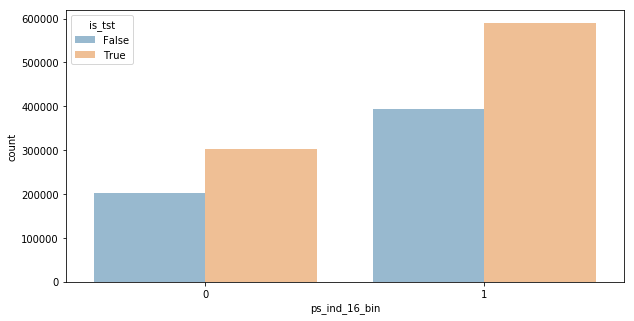

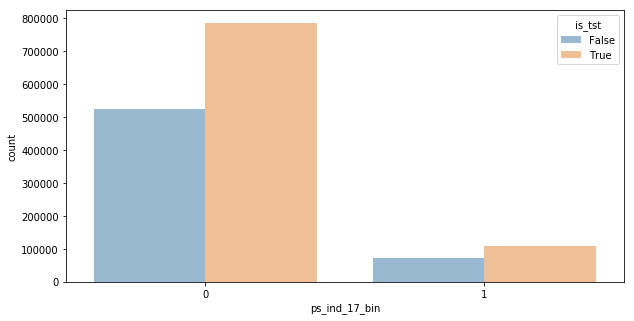

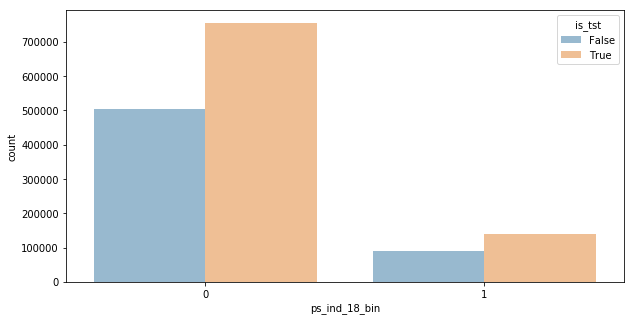

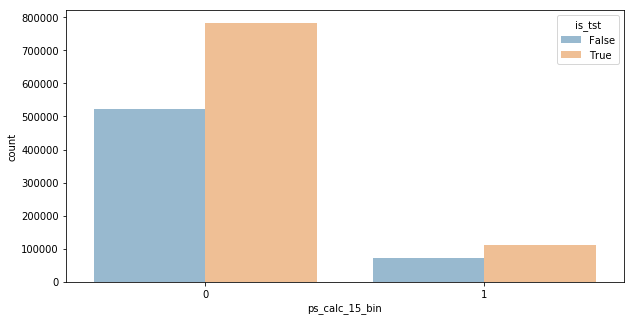

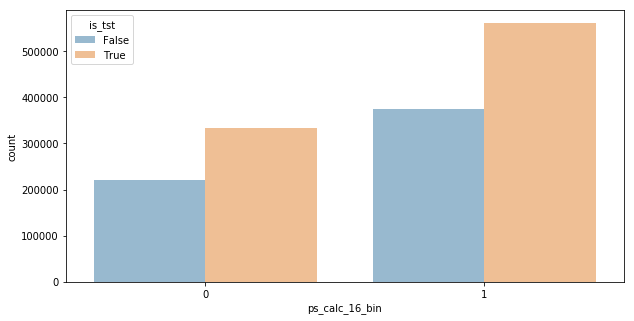

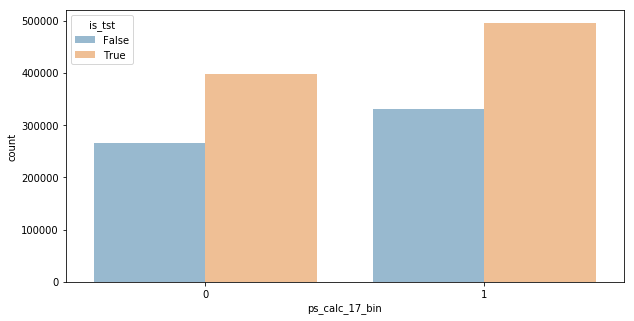

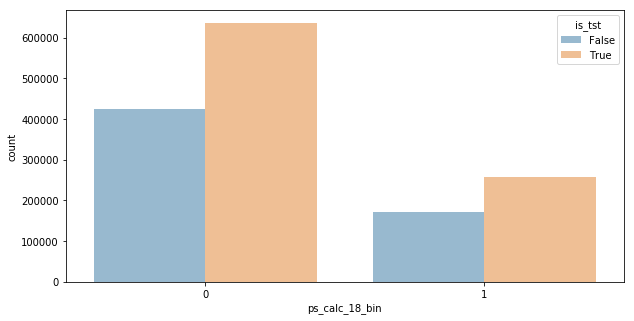

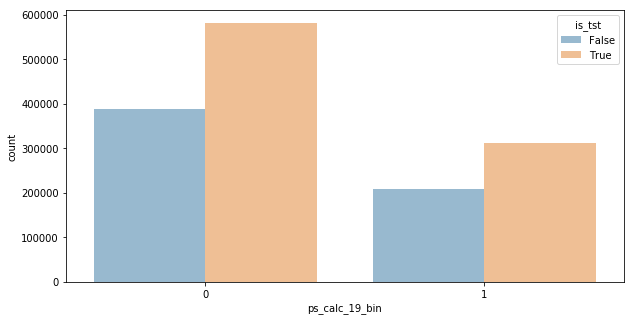

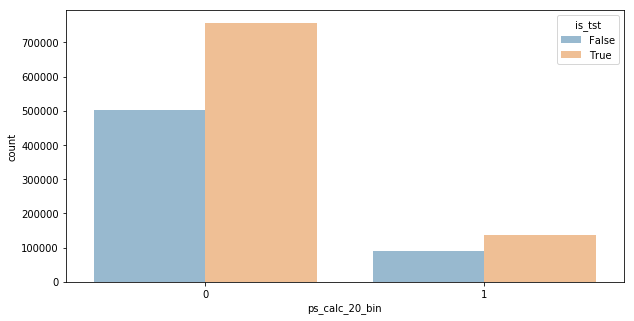

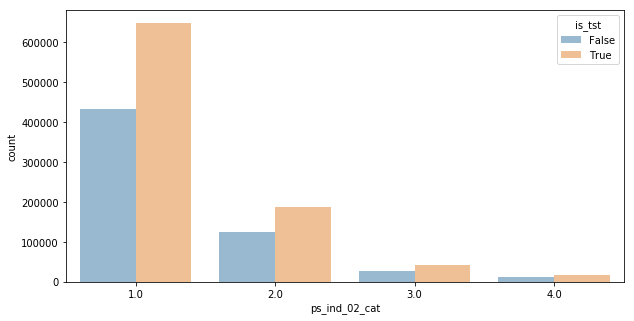

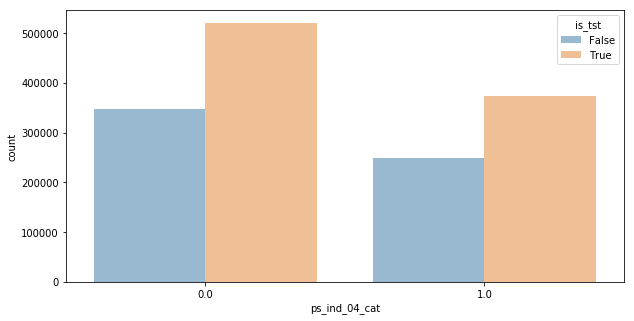

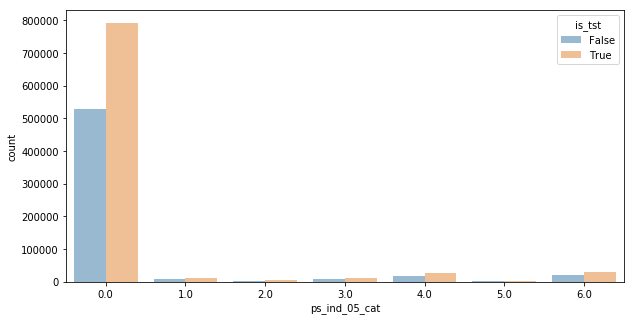

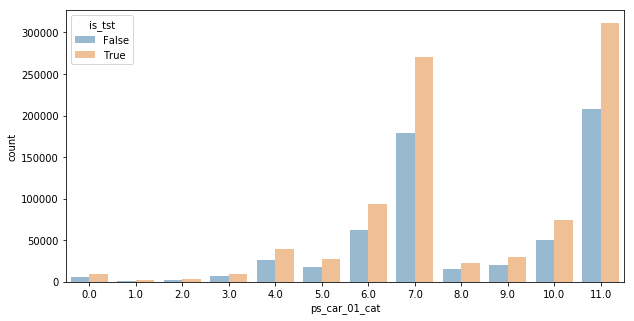

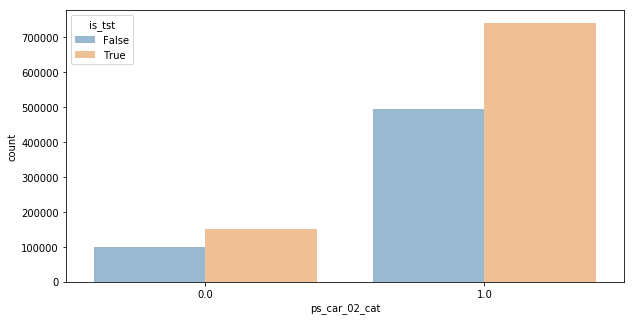

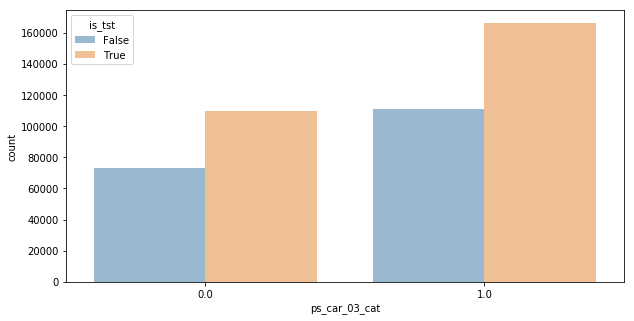

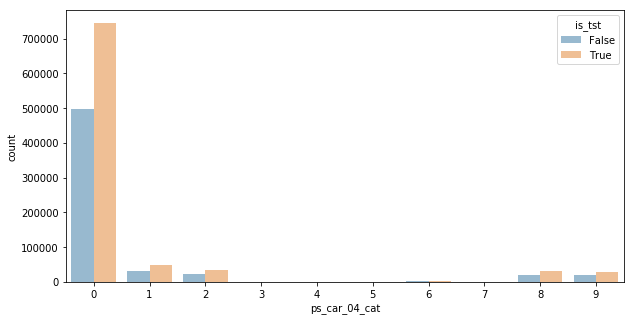

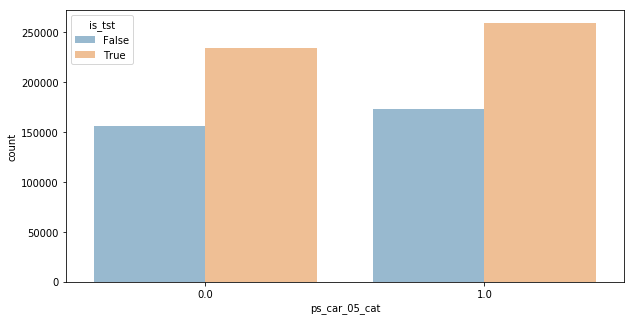

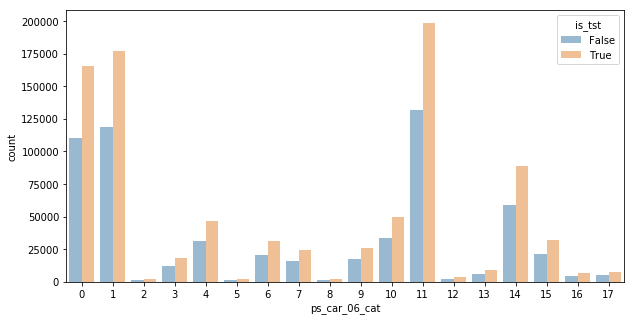

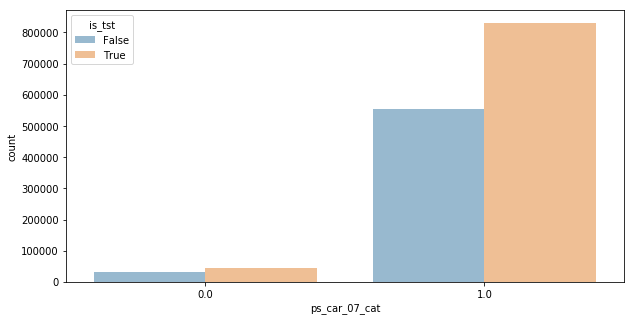

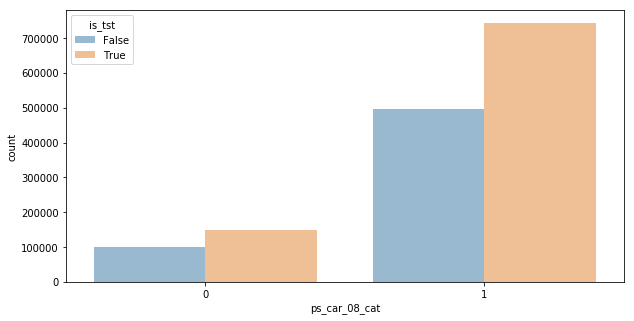

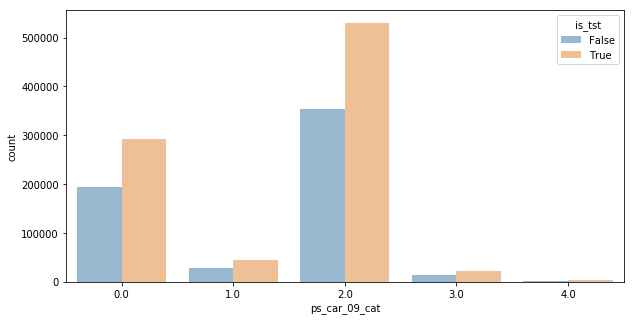

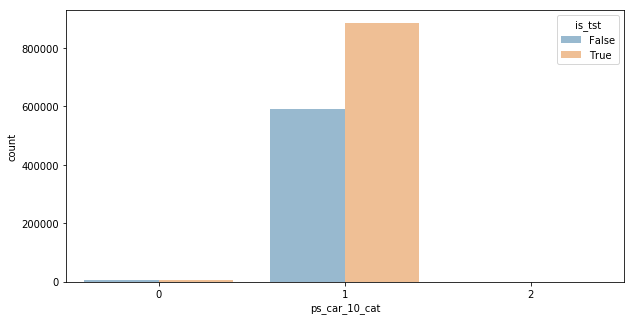

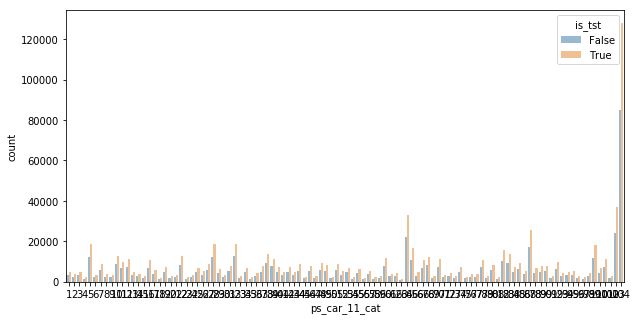

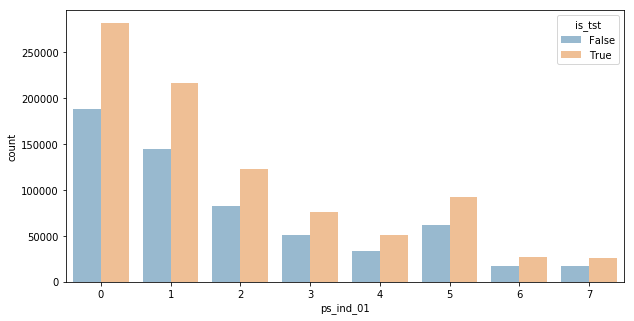

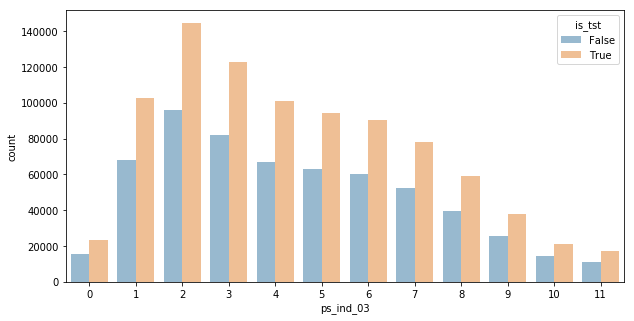

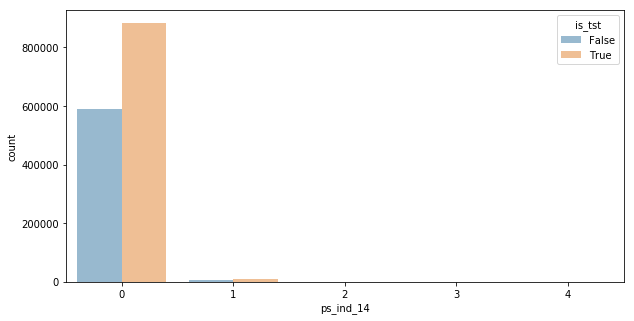

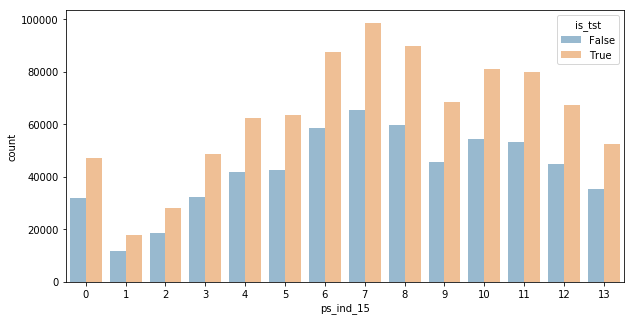

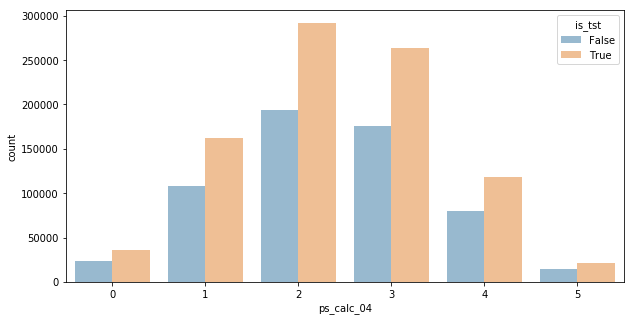

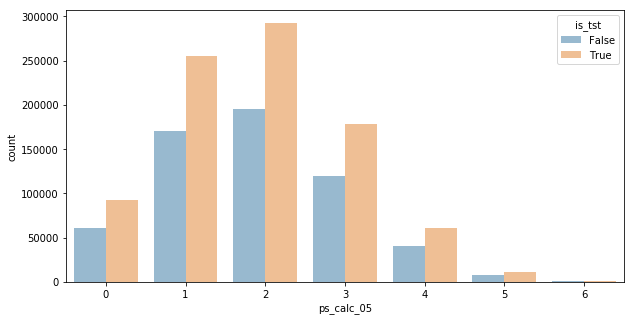

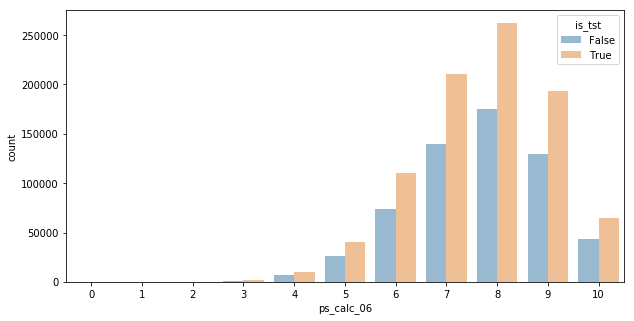

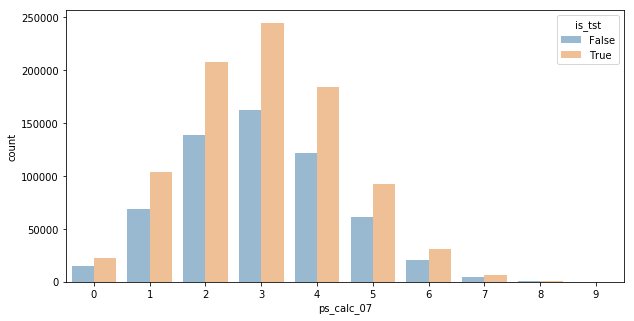

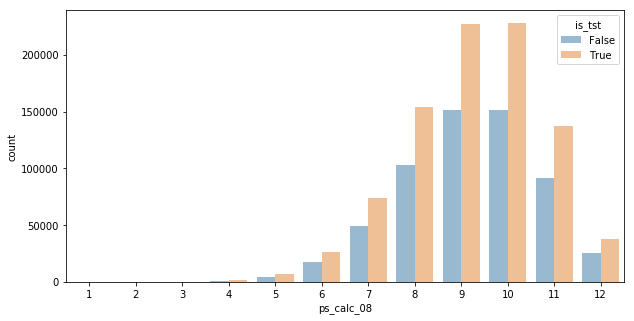

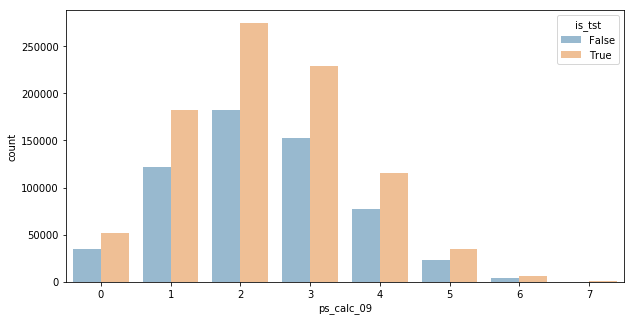

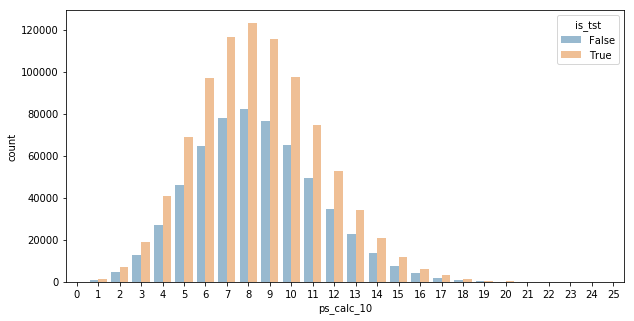

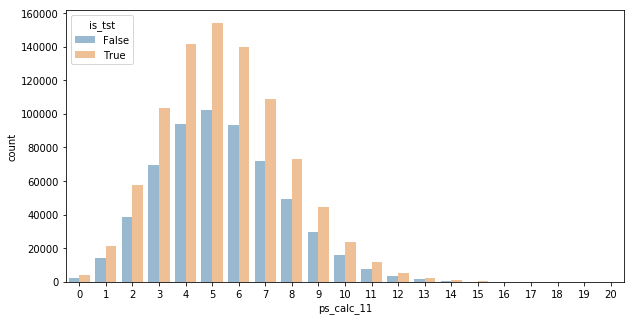

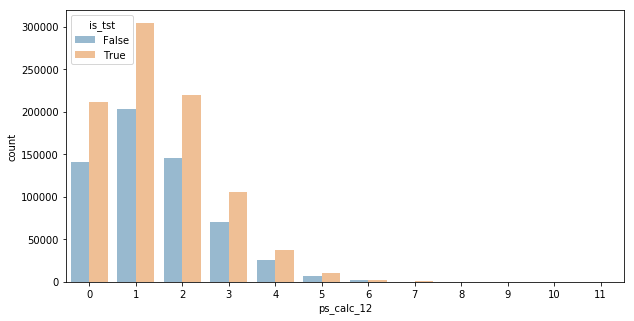

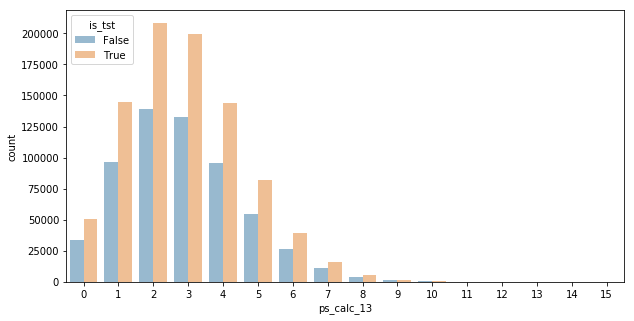

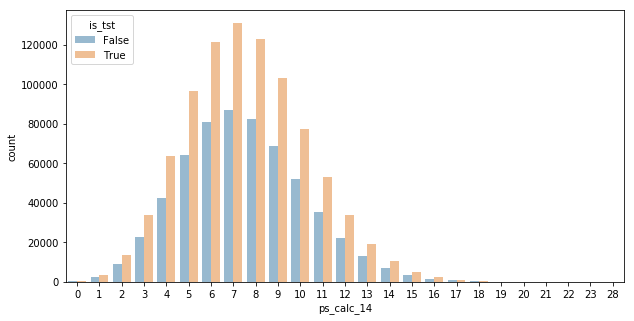

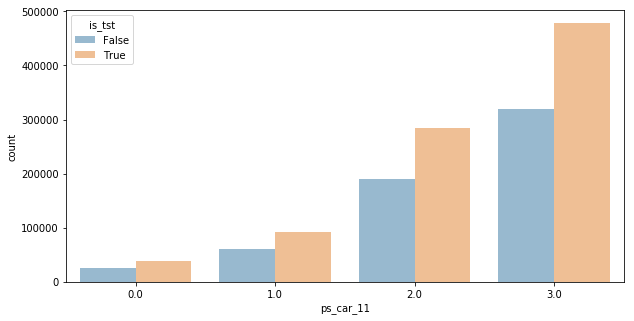

In [13]:
# 훈련 데이터와 테스트 데이터 비교
df['is_tst'] = df['target'].isnull() #구별하기위한 변수
for col in binary + category + integer:
    bar_plot(col, df, 'is_tst')

* 훈련 / 테스트 데이터 분포가 매우 유사함을 확인